# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math
import os
import sys
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("../scripts/")
from LinearizedADM import *

# Current and parent directories

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# Read zone information

In [3]:
zones = pd.read_excel(str(parent_directory) + '/data/Aras-Information.xlsx', sheet_name='Zone-Info')
num_zones = len(zones)

# Q-learning parameters

In [4]:
num_episodes = 20
num_iterations = 1000
num_timeslots = 1440
num_zones = 5
eps = 30
min_samples = 3
epsilon = 0.7
learning_rate = 0.8
discount_factor = 0.9
num_timeslots = 1440

# Save attack schedule (PEARL) for all houses and occupants

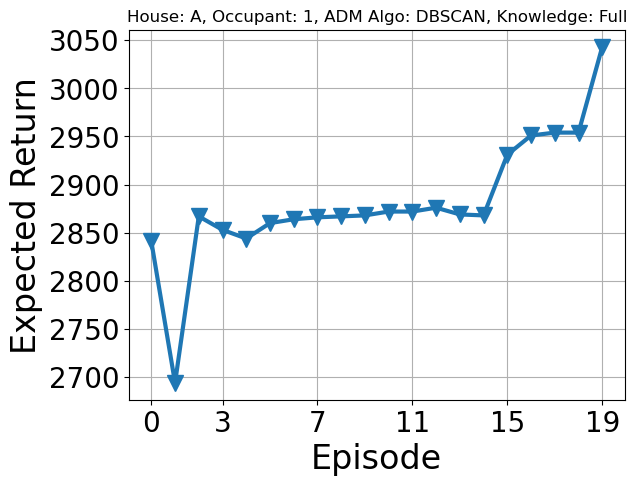

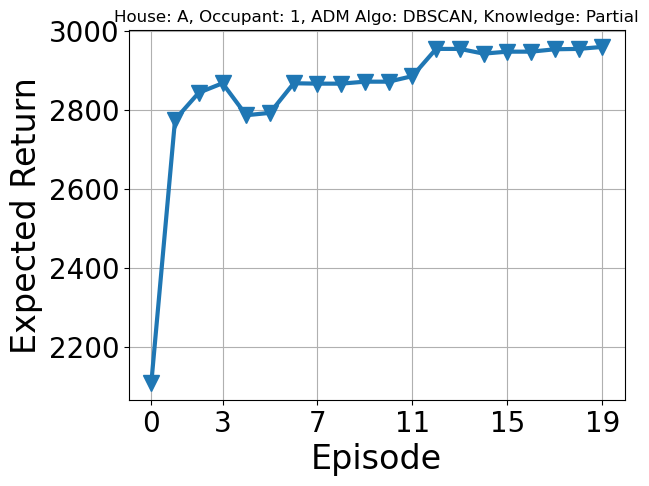

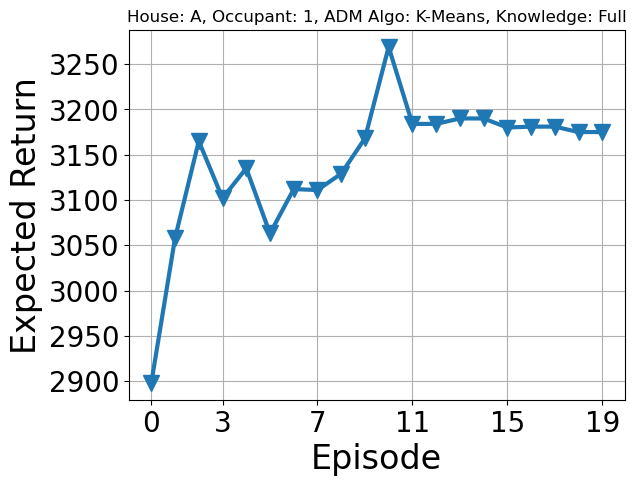

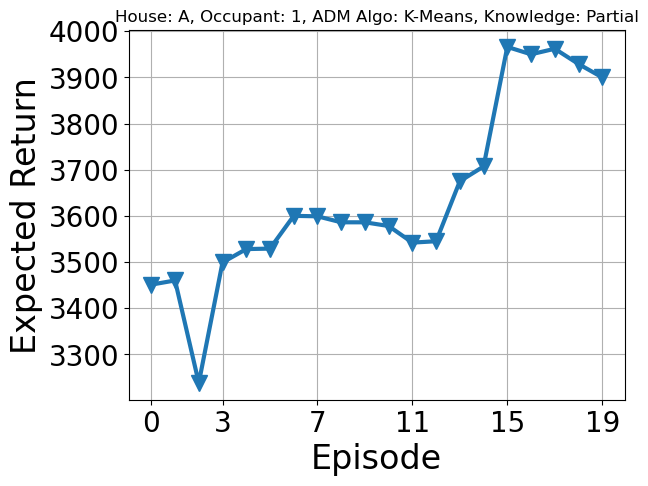

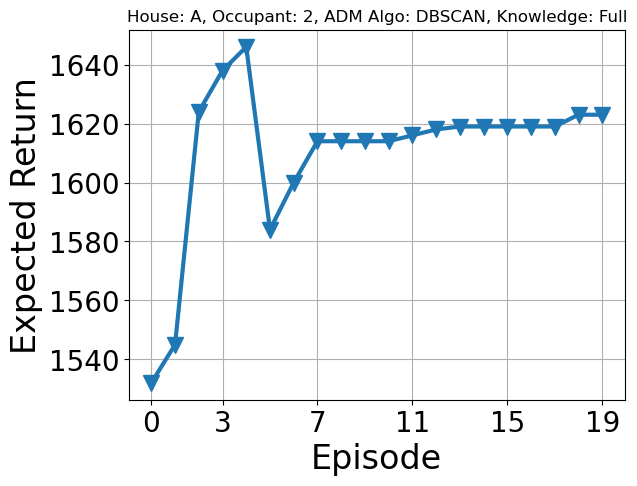

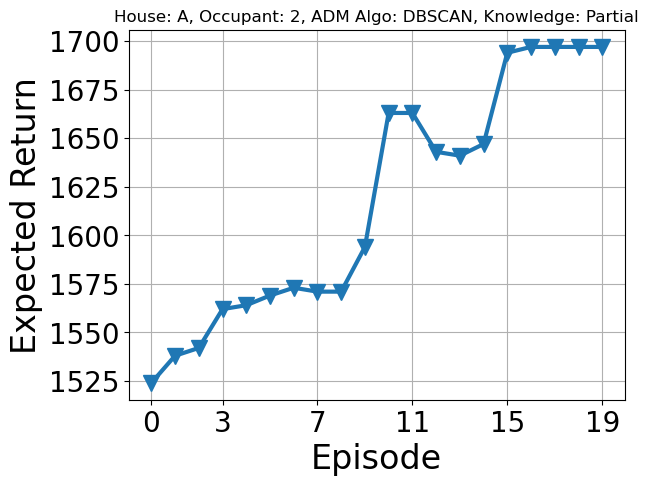

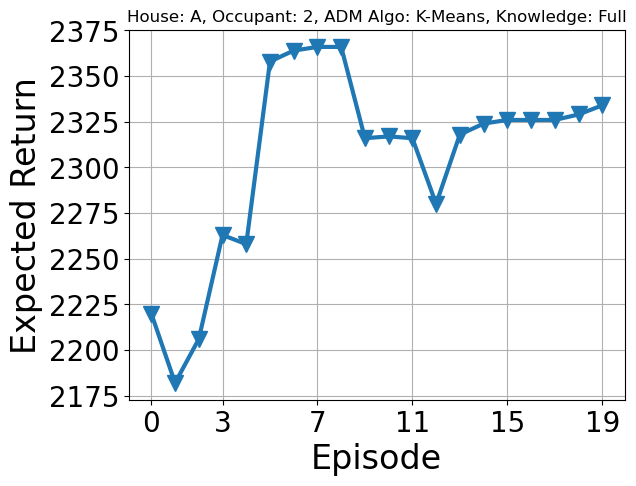

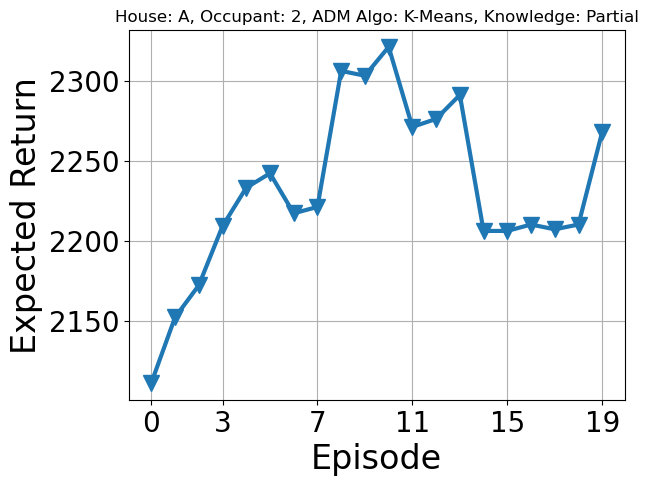

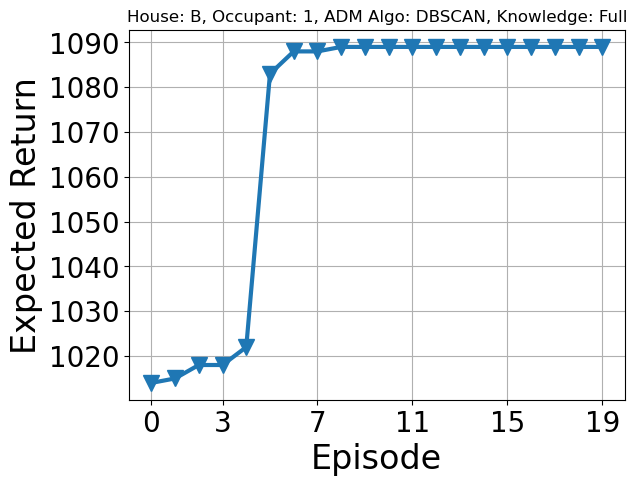

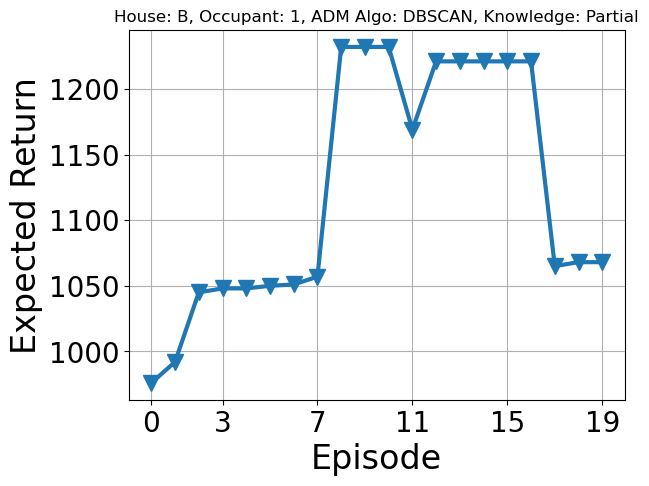

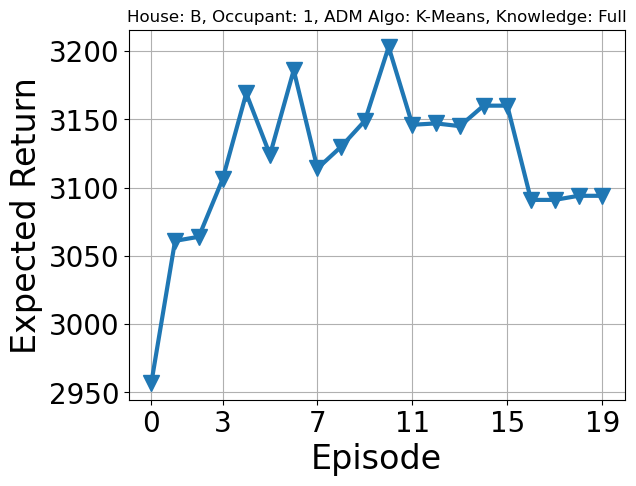

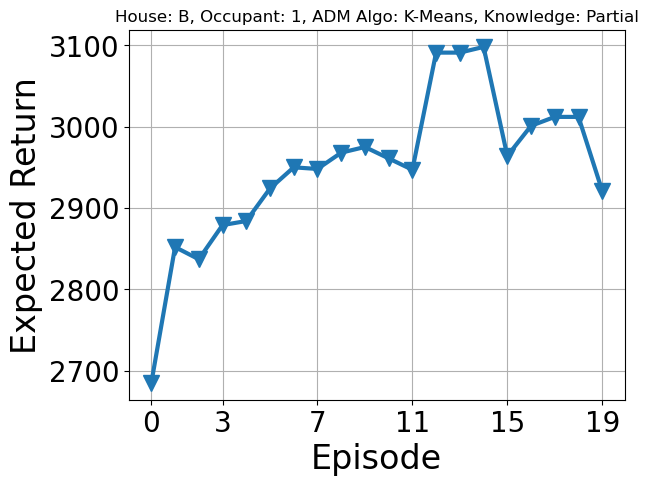

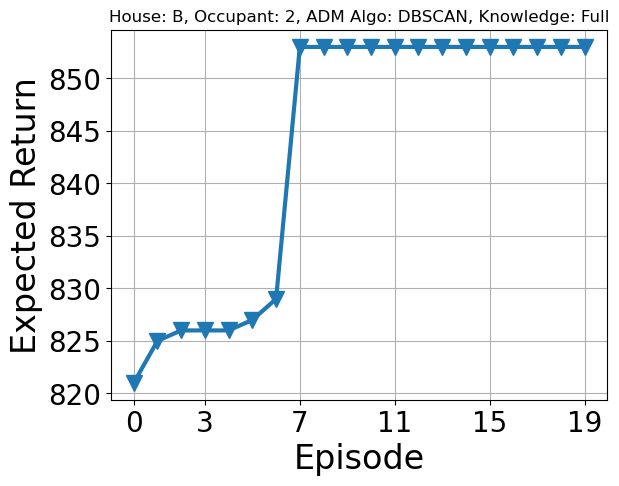

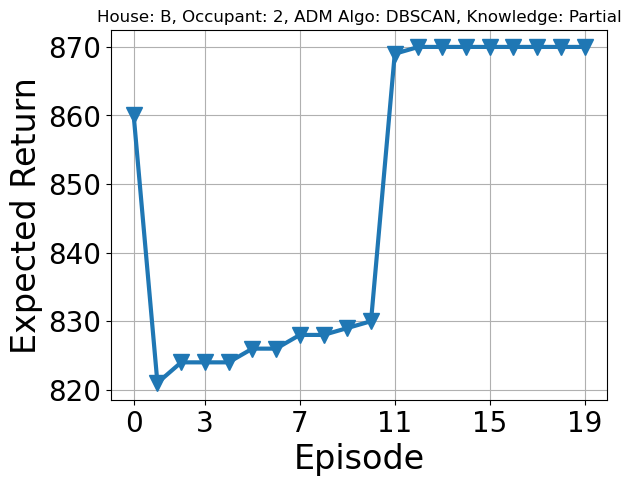

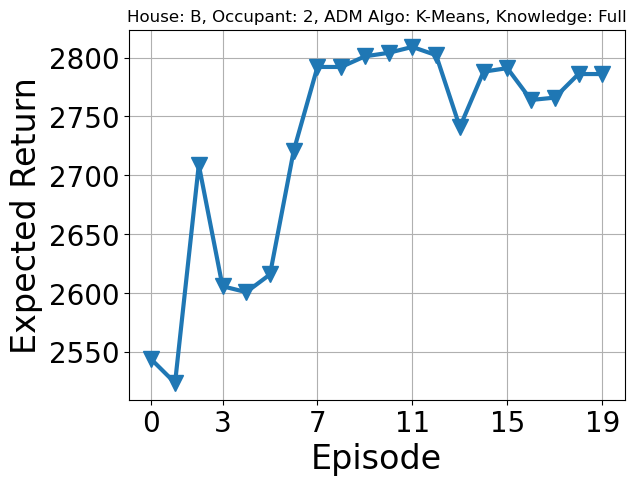

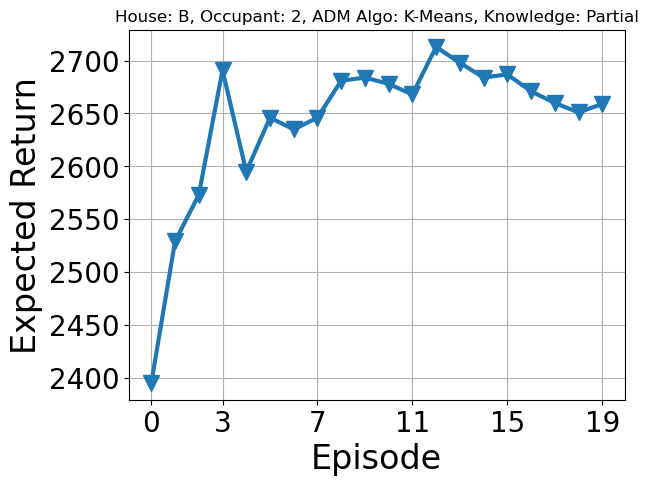

In [5]:
pearl_attack_costs_linearized = dict()

for house_name in ['A', 'B']:
    for occupant_id in ['1', '2']:
        dataframe = pd.read_csv(str(parent_directory) + '\data\\cleaned\\' + 'Cleaned-Dataframe_House-' + str(house_name) + '_Occupant-' + str(occupant_id) + '.csv')                                                                                                       
        for adm_algo in ["DBSCAN", "K-Means"]:
            for knowledge in ["Full", "Partial"]:
                    
                linearized_adm = LinearizedADM(adm_algo, dataframe, knowledge, house_name, occupant_id, num_timeslots, num_zones)
                list_time_min, list_time_max = linearized_adm.noise_augmented_range_calculation()
                q_learning = QLearning(num_timeslots, num_zones, list_time_min, list_time_max, num_episodes, num_iterations, epsilon, learning_rate, discount_factor)
                total_costs, attack_schedules = q_learning.model_training()
                
                
                pearl_attack_costs_linearized[str(adm_algo) + '-' + str(knowledge) + '_House-' + str(house_name) + '_Occupant-' + str(occupant_id)] = total_costs
                
                for i in range(num_episodes):
                    output_filename = str(parent_directory) + '\data\\attack-schedules\\pearl\\Linearized_' + str(adm_algo) + '-' + str(knowledge) + '_House-' + str(house_name) + '_Occupant-' + str(occupant_id) + '_Episode-' + str(i) + '.json'
                    with open(output_filename, "w") as json_file:
                        json.dump(attack_schedules[i], json_file)
                        
                fig = plt.figure()
                plt.plot(total_costs, marker = 'v', linewidth=3, markersize=12)
                plt.title("House: " + str(house_name) + ", Occupant: " + str(occupant_id) + ", ADM Algo: " + str(adm_algo) + ", Knowledge: " + str(knowledge))
                plt.yticks(fontsize="20")
                plt.xticks([0, 3, 7, 11, 15, 19], fontsize="20")
                plt.xlabel("Episode",fontsize="24")
                plt.ylabel("Expected Return",fontsize="24")
                # Show the grid
                plt.grid(True)
                plt.show()
                
# Saving total costs
output_filename = str(parent_directory) + '\data\\Pearl-Attack-Costs_Linearized' + '.json'

with open(output_filename, "w") as json_file:
    json.dump(pearl_attack_costs_linearized, json_file)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# line cyclers adapted to colourblind people
from cycler import cycler
line_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
               cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))